## Домашнее задание<a class='anchor' id='hw'>

**1. Обучить любую модель классификации на датасете IRIS до применения PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.**


In [115]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## bez PCA

In [116]:
X, y = load_iris(return_X_y=True)

Разделим выборку на обучающую и тестовую

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 4), (30, 4))

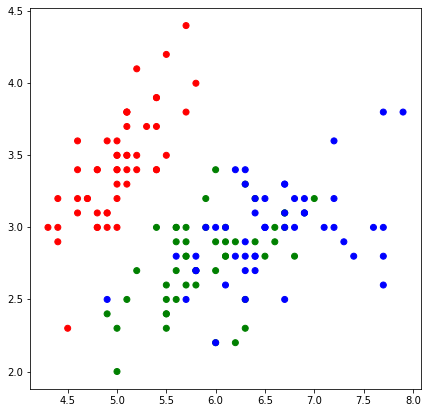

In [118]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [119]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [120]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    # расчет расстояний от классифицируемых объектов до
    # объектов обучающей выборки
    distances = np.sqrt(np.sum(np.square(x_test[:, np.newaxis] - x_train), axis=2))
                
    answers = []    
    for distance in distances:
        # Записываем в список значение расстояния и ответа на объекте обучающей выборки
        test_distances = [(dist, label) for dist, label in zip(distance, y_train)]
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [121]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [122]:
k = 100

In [123]:
# Проверим работу алгоритма

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма (без РСА) на трейне (без добавления весов для соседей) при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (без РСА) на тесте (без добавления весов для соседей) при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма (без РСА) на трейне (без добавления весов для соседей) при k = 100: 0.500
Точность алгоритма (без РСА) на тесте (без добавления весов для соседей) при k = 100: 0.467


### - $w(d) = \frac{1}{d+a}$,

In [124]:
def weights_n_neighbor(i, d):
    return 1 / (d + 0.1)

In [125]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма (без РСА) на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (без РСА) на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма (без РСА) на трейне при k = 100: 1.000
Точность алгоритма (без РСА) на тесте при k = 100: 0.967


## C PCA

In [126]:
X, y = load_iris(return_X_y=True)

In [127]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [128]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [129]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = standard_scale(X)

In [130]:
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [131]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979934, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021043, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.01353133569724, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.107225464292861, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [132]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.9624454132999, 22.850761786701742, 3.6689218892828745, 0.517870910715477]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [133]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [134]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)

In [135]:
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

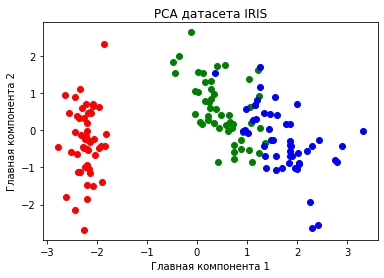

In [136]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

Разделим выборку на обучающую и тестовую

In [137]:
X_train, X_test, y_train, y_test = train_test_split(Z, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

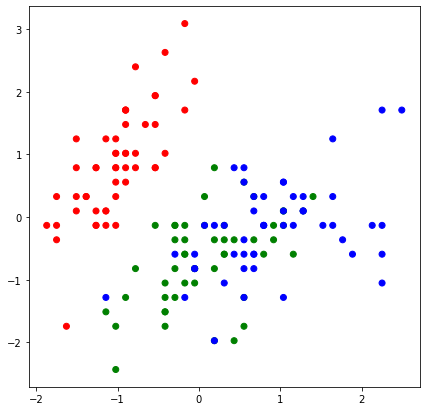

In [138]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [139]:
# Проверим работу алгоритма

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма (c РСА) на трейне (без добавления весов для соседей) при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (c РСА) на тесте (без добавления весов для соседей) при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма (c РСА) на трейне (без добавления весов для соседей) при k = 100: 0.675
Точность алгоритма (c РСА) на тесте (без добавления весов для соседей) при k = 100: 0.567


In [140]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма (с РСА) на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма (с РСА) на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма (с РСА) на трейне при k = 100: 0.975
Точность алгоритма (с РСА) на тесте при k = 100: 0.800


### Вывод:

После обучения модели классификации KNN на датасете IRIS до применения PCA (2 компоненты) и после него,
мы получили следующие результаты:

Точность алгоритма (без РСА) на тесте (без добавления весов для соседей) при k = 100: **0.467**

Точность алгоритма (без РСА) на тесте (с добавлениум весов для соседей) при k = 100: **0.967**

Точность алгоритма (c РСА) на тесте (без добавления весов для соседей) при k = 100: **0.567**

Точность алгоритма (с РСА) на тесте (с добавлениум весов для соседей) при k = 100: **0.800**

**Т.е.в данном случае модель с РСА показала лучше результаты без учета весов, но при добавлении весов сработала хуже, чем без РСА.**

**2. *Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)**

#### SVD

Сформулировав принцип реализации метода главных компонент, нельзя не заметить его родство с сингулярным разложением матриц (SVD). Вспомним, что сингулярное разложение матрицы - это разложение вида

$$X=UDV^{T},$$

- столбцы ортогональной матрицы $U$ - это собственные векторы матрицы $XX^{T}$
- столбцы ортогональной матрицы $V$ - собственные векторы матрицы $X^{T}X$
- на главной диагонали диагональной матрицы $D$ расположены собственные значения матриц $XX^{T}$ и $X^{T}X$ (они равны и также называются сингулярными числами матрицы $X$).

Таким образом, для реализации понижения размерности методом главных компонент с помощью SVD нужно:
- найти сингулярное разложение $X^TX$;
- сформировать из столбцов матрицы $V$, соответствующих $d$ наибольшим сингулярным числам, матрицу весов $W$;
- получить новую матрицу "объекты-признаки", умножив исходную матрицу $X$ на матрицу весов $W$:

$$Z=XW.$$

Интересное задание, но со временем напряженка :(